# Movie Review - Sentiment Analysis

## Data Exploration

In [6]:
import pandas as pd
df = pd.read_csv('train.tsv', header=0,delimiter='\t')
print (df.count())
print (df.head())
print (df['Sentiment'].describe())

PhraseId      156060
SentenceId    156060
Phrase        156060
Sentiment     156060
dtype: int64
   PhraseId  SentenceId                                             Phrase  \
0         1           1  A series of escapades demonstrating the adage ...   
1         2           1  A series of escapades demonstrating the adage ...   
2         3           1                                           A series   
3         4           1                                                  A   
4         5           1                                             series   

   Sentiment  
0          1  
1          2  
2          2  
3          2  
4          2  
count    156060.000000
mean          2.063578
std           0.893832
min           0.000000
25%           2.000000
50%           2.000000
75%           3.000000
max           4.000000
Name: Sentiment, dtype: float64


## Plotting data

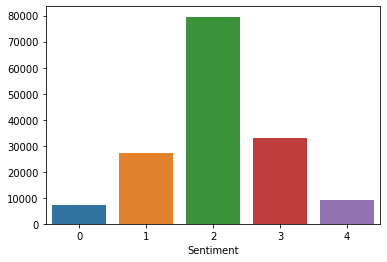

In [3]:
import seaborn as sb
sent=df.groupby(['Sentiment']).size()
sb.barplot(sent.keys(),sent.values);

## Splitting Data

In [5]:
from sklearn.model_selection import train_test_split
X, y = df['Phrase'], df['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)
X_train

62530     the ambiguous ending seem goofy rather than pr...
35776           '' is the operative word for `` Bad Company
112928                                    complete shambles
119989                                          Ponderous ,
103789                                           persistent
                                ...                        
115886    pee-related sight gags that might even cause T...
98628     Sometimes this modest little number clicks , a...
70077                                                burlap
97560              fleshed-out enough to build any interest
47915                       their lives , loves and the art
Name: Phrase, Length: 78030, dtype: object

## Pipeline

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('vect', TfidfVectorizer(stop_words='english')),
        ('clf', LogisticRegression())
    ])
parameters = {
        'vect__max_df': (0.25, 0.5),
        'vect__ngram_range': ((1, 1), (1, 2)),
        'vect__use_idf': (True, False),
        'clf__C': (0.1, 1, 10),
    }


C:\Users\home\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.linear_model.logistic module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)


In [10]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(pipeline, parameters, n_jobs=3,verbose=1, scoring='accuracy')
grid_search.fit(X_train, y_train)
print ('Best score: %0.3f' % grid_search.best_score_)
print ('Best parameters set:')
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print ('\t%s: %r' % (param_name, best_parameters[param_name]))


Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed: 10.5min
[Parallel(n_jobs=3)]: Done 120 out of 120 | elapsed: 27.9min finished


Best score: 0.620
Best parameters set:
	clf__C: 10
	vect__max_df: 0.25
	vect__ngram_range: (1, 2)
	vect__use_idf: False


C:\Users\home\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## Testing

Accuracy: 0.6273228245546585
Confusion Matrix: [[  967  1624   814    89    12]
 [  732  5710  6584   580    60]
 [  169  3112 32790  3331   211]
 [   25   516  6831  7789  1409]
 [    0    45   588  2348  1694]]
Classification Report:               precision    recall  f1-score   support

           0       0.51      0.28      0.36      3506
           1       0.52      0.42      0.46     13666
           2       0.69      0.83      0.75     39613
           3       0.55      0.47      0.51     16570
           4       0.50      0.36      0.42      4675

    accuracy                           0.63     78030
   macro avg       0.55      0.47      0.50     78030
weighted avg       0.61      0.63      0.61     78030



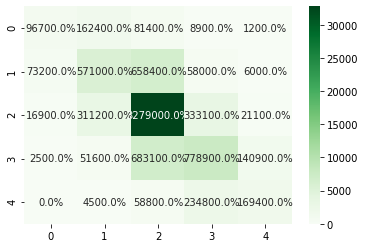

In [15]:
predictions = grid_search.predict(X_test)
print ('Accuracy:', accuracy_score(y_test, predictions))
print ('Confusion Matrix:', confusion_matrix(y_test, predictions))
print ('Classification Report:', classification_report(y_test, predictions))
sb.heatmap(confusion_matrix(y_test, predictions),annot=True,fmt='0.001%',cmap='Greens')
